# Вариант 2. Показатели сердечных заболеваний

Этот датасет представляет собой данные, собранные в ходе ежегодного опроса CDC о состоянии здоровья более 400 тысяч взрослых в США. Он включает информацию о различных факторах риска сердечных заболеваний, таких как гипертония, высокий уровень холестерина, курение, диабет, ожирение, недостаток физической активности и злоупотребление алкоголем. Также содержатся данные о состоянии здоровья респондентов, наличии хронических заболеваний (например, диабет, артрит, астма), уровне физической активности, психологическом здоровье, а также о социальных и демографических характеристиках, таких как пол, возраст, этническая принадлежность и место проживания. Датасет предоставляет информацию, которая может быть использована для анализа и предсказания риска сердечных заболеваний, а также для разработки программ профилактики и улучшения общественного здоровья.

#### Бизнес-цели:
- Предсказание риска сердечных заболеваний: создание модели для определения вероятности заболевания сердечными болезнями на основе факторов риска.
- Идентификация ключевых факторов, влияющих на здоровье: выявление наиболее значимых факторов, влияющих на риск сердечных заболеваний, чтобы разработать программы профилактики.

#### Цели технического проекта:
- Предсказание риска сердечных заболеваний: разработка модели машинного обучения (например, логистической регрессии, случайного леса) для классификации респондентов по риску сердечных заболеваний (с использованием функции "HadHeartAttack").
- Идентификация ключевых факторов: анализ факторов, влияющих на развитие сердечных заболеваний, чтобы выявить наиболее значимые признаки для предсказания.

Краткое описание для колонок:
1. **State** — штат проживания респондента.
2. **Sex** — пол респондента.
3. **GeneralHealth** — общее самочувствие респондента.
4. **PhysicalHealthDays** — количество дней, когда респондент испытывал физические ограничения.
5. **MentalHealthDays** — количество дней с психическими ограничениями.
6. **LastCheckupTime** — время последнего медицинского осмотра.
7. **PhysicalActivities** — уровень физической активности респондента.
8. **SleepHours** — количество часов сна.
9. **RemovedTeeth** — наличие отсутствующих зубов.
10. **HadHeartAttack** — был ли у респондента сердечный приступ (целевая переменная).
11. **HadAngina** — был ли у респондента стенокардия.
12. **HadStroke** — был ли у респондента инсульт.
13. **HadAsthma** — был ли у респондента астма.
14. **HadSkinCancer** — был ли у респондента рак кожи.
15. **HadCOPD** — был ли у респондента хронический обструктивный бронхит.
16. **HadDepressiveDisorder** — был ли у респондента депрессивное расстройство.
17. **HadKidneyDisease** — был ли у респондента заболевания почек.
18. **HadArthritis** — был ли у респондента артрит.
19. **HadDiabetes** — был ли у респондента диабет.
20. **DeafOrHardOfHearing** — имеется ли у респондента проблемы со слухом.
21. **BlindOrVisionDifficulty** — имеются ли у респондента проблемы со зрением.
22. **DifficultyConcentrating** — имеется ли у респондента проблемы с концентрацией внимания.
23. **DifficultyWalking** — имеются ли у респондента проблемы с ходьбой.
24. **DifficultyDressingBathing** — имеются ли у респондента проблемы с одеванием и купанием.
25. **DifficultyErrands** — имеются ли у респондента проблемы с выполнением повседневных дел.
26. **SmokerStatus** — статус курения респондента.
27. **ECigaretteUsage** — использование электронных сигарет.
28. **ChestScan** — проходил ли респондент обследование грудной клетки.
29. **RaceEthnicityCategory** — этническая принадлежность респондента.
30. **AgeCategory** — возрастная категория респондента.
31. **HeightInMeters** — рост респондента в метрах.
32. **WeightInKilograms** — вес респондента в килограммах.
33. **BMI** — индекс массы тела.
34. **AlcoholDrinkers** — является ли респондент алкоголиком.
35. **HIVTesting** — проходил ли респондент тест на ВИЧ.
36. **FluVaxLast12** — получал ли респондент прививку от гриппа за последние 12 месяцев.
37. **PneumoVaxEver** — получал ли респондент прививку от пневмококка.
38. **TetanusLast10Tdap** — получал ли респондент прививку от столбняка за последние 10 лет.
39. **HighRiskLastYear** — был ли респондент в группе высокого риска в прошлом году.
40. **CovidPos** — был ли респондент заражен COVID-19.

In [362]:
from typing import Any
from math import ceil

import pandas as pd
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Загрузим данные из датасета

In [249]:
df = pd.read_csv('csv\\heart_2022_no_nans.csv')

## Посмотрим общие сведения о датасете

In [250]:
df.info()
df.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

count       mean        std    min    25%    50%  \
PhysicalHealthDays  246022.0   4.119026   8.405844   0.00   0.00   0.00   
MentalHealthDays    246022.0   4.167140   8.102687   0.00   0.00   0.00   
SleepHours          246022.0   7.021331   1.440681   1.00   6.00   7.00   
HeightInMeters      246022.0   1.705150   0.106654   0.91   1.63   1.70   
WeightInKilograms   246022.0  83.615179  21.323156  28.12  68.04  81.65   
BMI                 246022.0  28.668136   6.513973  12.02  24.27  27.46   

                      75%     max  
PhysicalHealthDays   3.00   30.00  
MentalHealthDays     4.00   30.00  
SleepHours           8.00   24.00  
HeightInMeters       1.78    2.41  
WeightInKilograms   95.25  292.57  
BMI                 31.89   97.65

## Получим информацию о пустых значениях в колонках датасета

In [251]:
def get_null_columns_info(df: DataFrame) -> DataFrame:
    """
    Возвращает информацию о пропущенных значениях в колонках датасета
    """
    w = []
    df_len = len(df)

    for column in df.columns:
        column_nulls = df[column].isnull()
        w.append([column, column_nulls.any(), column_nulls.sum() / df_len])

    null_df = DataFrame(w).rename(columns={0: "Column", 1: "Has Null", 2: "Null Percent"})

    return null_df

In [252]:
get_null_columns_info(df)

Column  Has Null  Null Percent
0                       State     False           0.0
1                         Sex     False           0.0
2               GeneralHealth     False           0.0
3          PhysicalHealthDays     False           0.0
4            MentalHealthDays     False           0.0
5             LastCheckupTime     False           0.0
6          PhysicalActivities     False           0.0
7                  SleepHours     False           0.0
8                RemovedTeeth     False           0.0
9              HadHeartAttack     False           0.0
10                  HadAngina     False           0.0
11                  HadStroke     False           0.0
12                  HadAsthma     False           0.0
13              HadSkinCancer     False           0.0
14                    HadCOPD     False           0.0
15      HadDepressiveDisorder     False           0.0
16           HadKidneyDisease     False           0.0
17               HadArthritis     False           0.0
18                HadDiabetes     False           0.0
19        DeafOrHardOfHearing     False           0.0
20    BlindOrVisionDifficulty     False           0.0
21    DifficultyConcentrating     False           0.0
22          DifficultyWalking     False           0.0
23  DifficultyDressingBathing     False           0.0
24          DifficultyErrands     False           0.0
25               SmokerStatus     False           0.0
26            ECigaretteUsage     False           0.0
27                  ChestScan     False           0.0
28      RaceEthnicityCategory     False           0.0
29                AgeCategory     False           0.0
30             HeightInMeters     False           0.0
31          WeightInKilograms     False           0.0
32                        BMI     False           0.0
33            AlcoholDrinkers     False           0.0
34                 HIVTesting     False           0.0
35               FluVaxLast12     False           0.0
36              PneumoVaxEver     False           0.0
37          TetanusLast10Tdap     False           0.0
38           HighRiskLastYear     False           0.0
39                   CovidPos     False           0.0

## Получим информацию о выбросах

In [371]:
def get_numeric_columns(df: DataFrame) -> list[str]:
    """
    Возвращает список числовых колонок
    """
    return list(filter(lambda column: pd.api.types.is_numeric_dtype(df[column]), df.columns))

def get_filtered_columns(df: DataFrame, no_numeric=False, no_text=False) -> list[str]:
    """
    Возвращает список колонок по фильтру
    """
    w = []
    for column in df.columns:
        if no_numeric and pd.api.types.is_numeric_dtype(df[column]):
            continue
        if no_text and not pd.api.types.is_numeric_dtype(df[column]):
            continue
        w.append(column)
    return w

In [254]:
def get_outliers_info(df: DataFrame) -> DataFrame:
    """
    Возаращает информацию о выбросах в числовых колонках датасета
    """
    data = {
        "Column": [],
        "Has Outliers": [],
        "Outliers Count": [],
        "Min Value": [],
        "Max Value": [],
        "Q1": [],
        "Q3": []
    }

    info = DataFrame(data)

    for column in get_numeric_columns(df):
        Q1: float = df[column].quantile(0.25)
        Q3: float = df[column].quantile(0.75)
        IQR: float = Q3 - Q1

        lower_bound: float = Q1 - 1.5 * IQR
        upper_bound: float = Q3 + 1.5 * IQR

        outliers: DataFrame = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count: int = outliers.shape[0]

        info.loc[len(info)] = [column, outlier_count > 0, outlier_count, df[column].min(), df[column].max(), Q1, Q3]

    return info

Посмотрим данные по выбросам

In [255]:
outliers_info = get_outliers_info(df)
outliers_info

Column  Has Outliers  Outliers Count  Min Value  Max Value  \
0  PhysicalHealthDays          True           38810       0.00      30.00   
1    MentalHealthDays          True           32714       0.00      30.00   
2          SleepHours          True            3488       1.00      24.00   
3      HeightInMeters          True             830       0.91       2.41   
4   WeightInKilograms          True            5940      28.12     292.57   
5                 BMI          True            7563      12.02      97.65   

      Q1     Q3  
0   0.00   3.00  
1   0.00   4.00  
2   6.00   8.00  
3   1.63   1.78  
4  68.04  95.25  
5  24.27  31.89

In [256]:
def visualize_outliers(df: DataFrame) -> None:
    """
    Генерирует диаграммы BoxPlot для числовых колонок датасета
    """
    columns = get_numeric_columns(df)
    plt.figure(figsize=(15, 10))
    rows: int = ceil(len(columns) / 3)
    for index, column in enumerate(columns, 1):
        plt.subplot(rows, 3, index)
        plt.boxplot(df[column], vert=True, patch_artist=True)
        plt.title(f"Диаграмма размахов\n\"{column}\"")
        plt.xlabel(column)
            
    plt.tight_layout()
    plt.show()

Визуализируем выбросы с помощью диаграмм

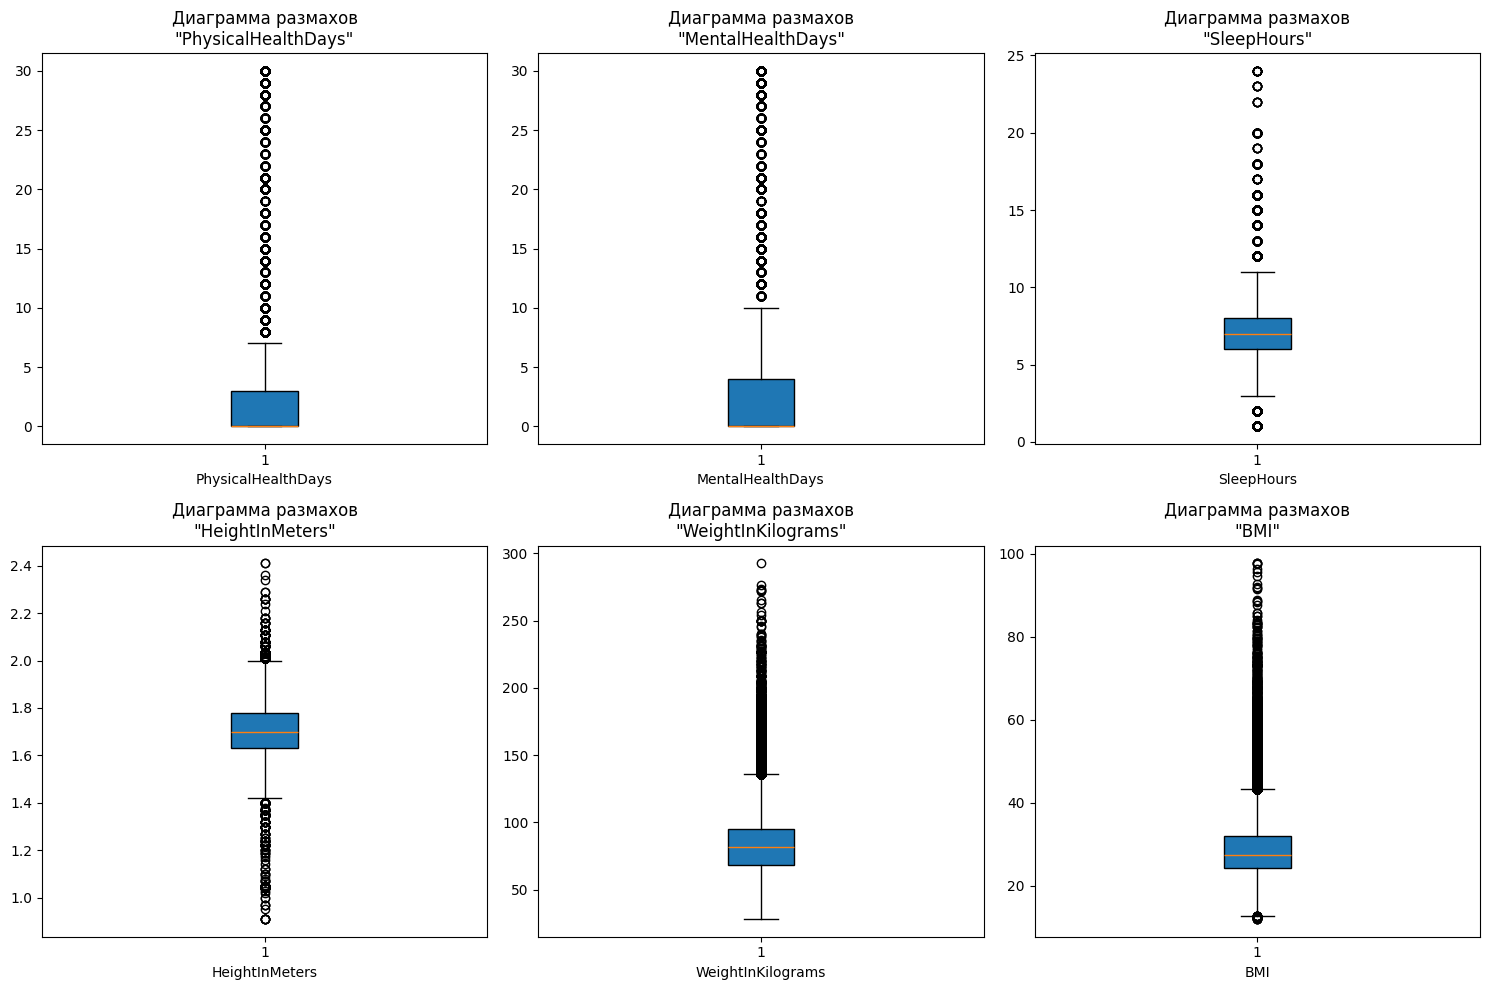

In [257]:
visualize_outliers(df)

In [258]:
def remove_outliers(df: DataFrame, columns: list[str]) -> DataFrame:
    """
    Устраняет выбросы в заданных колонках:
    задает значениям выше максимального значение максимума, ниже минимального - значение минимума
    """
    for column in columns:
        Q1: float = df[column].quantile(0.25)
        Q3: float = df[column].quantile(0.75)
        IQR: float = Q3 - Q1

        lower_bound: float = Q1 - 1.5 * IQR
        upper_bound: float = Q3 + 1.5 * IQR

        df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    
    return df

Удаляем выбросы

In [259]:
outliers_columns = list(outliers_info[outliers_info["Has Outliers"] == True]["Column"])
df = remove_outliers(df, outliers_columns)

Снова получим данные о выбросах

In [260]:
get_outliers_info(df)

Column  Has Outliers  Outliers Count  Min Value  Max Value  \
0  PhysicalHealthDays         False               0      0.000      7.500   
1    MentalHealthDays         False               0      0.000     10.000   
2          SleepHours         False               0      3.000     11.000   
3      HeightInMeters         False               0      1.405      2.005   
4   WeightInKilograms         False               0     28.120    136.065   
5                 BMI         False               0     12.840     43.320   

      Q1     Q3  
0   0.00   3.00  
1   0.00   4.00  
2   6.00   8.00  
3   1.63   1.78  
4  68.04  95.25  
5  24.27  31.89

Видим, что выбросов не осталось - проверим через диаграммы

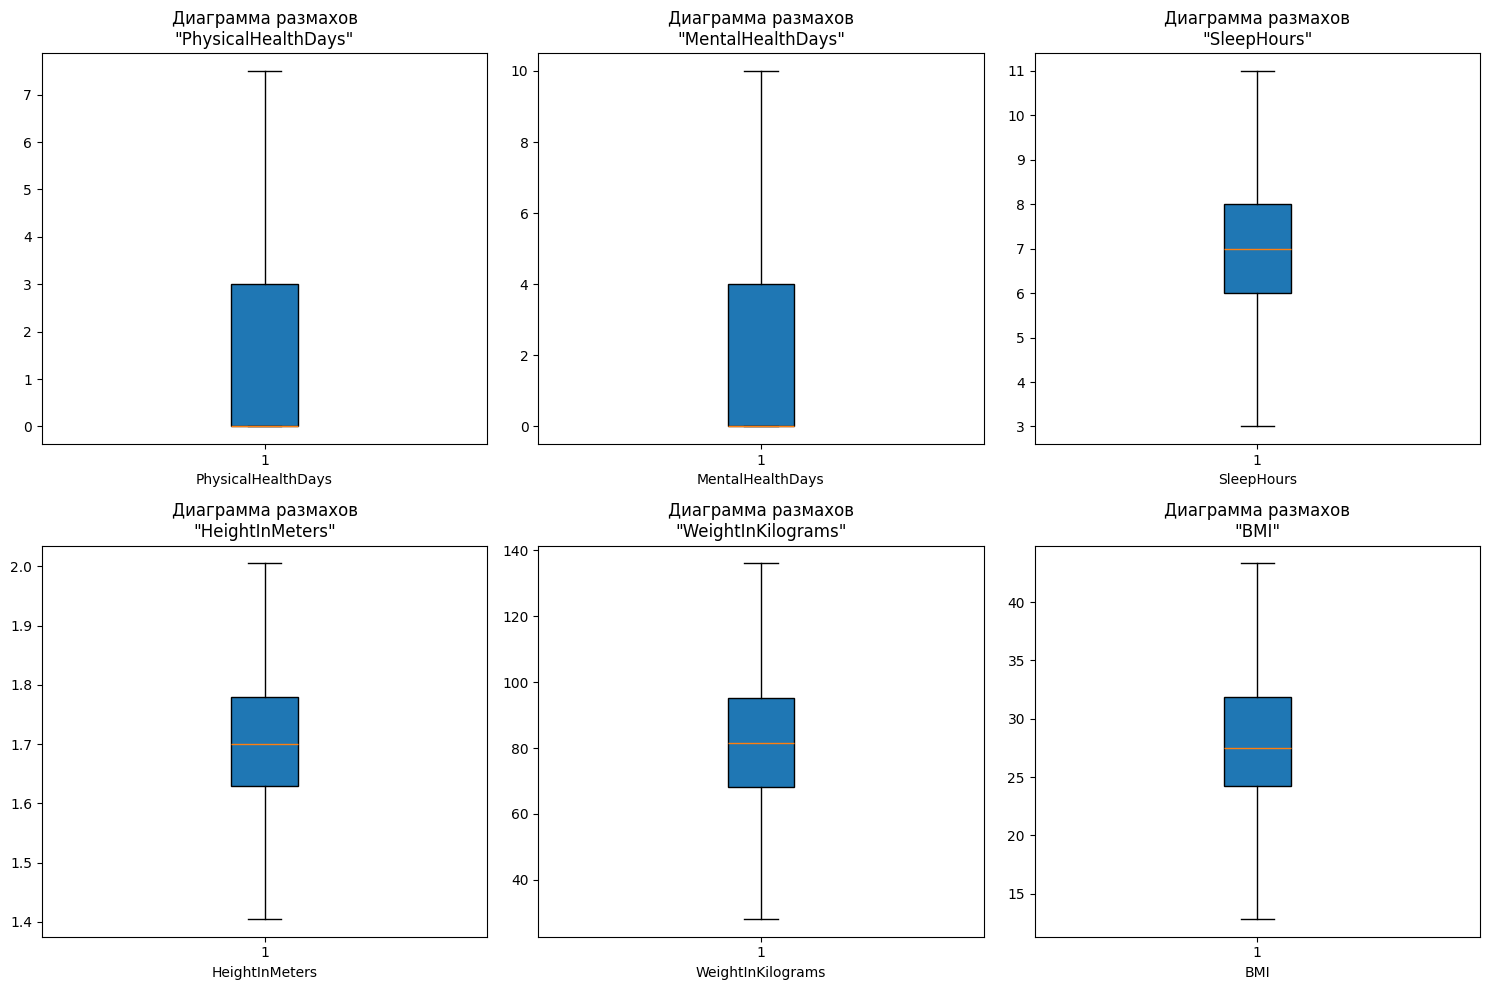

In [261]:
visualize_outliers(df)

## Нормализация числовых признаков

In [262]:
from sklearn import preprocessing

In [263]:
min_max_scaler = preprocessing.MinMaxScaler()

df_norm = df.copy()

numeric_columns = get_numeric_columns(df)

for column in numeric_columns:
    norm_column = column + "Norm"
    df_norm[norm_column] = min_max_scaler.fit_transform(
        df_norm[column].to_numpy().reshape(-1, 1)
    ).reshape(df_norm[column].shape)

df_norm = df_norm.drop(columns=numeric_columns)


df_norm.describe().transpose()

count      mean       std  min       25%       50%  \
PhysicalHealthDaysNorm  246022.0  0.253306  0.385378  0.0  0.000000  0.000000   
MentalHealthDaysNorm    246022.0  0.244973  0.378598  0.0  0.000000  0.000000   
SleepHoursNorm          246022.0  0.501124  0.165569  0.0  0.375000  0.500000   
HeightInMetersNorm      246022.0  0.500401  0.176240  0.0  0.375000  0.491667   
WeightInKilogramsNorm   246022.0  0.510963  0.186742  0.0  0.369818  0.495901   
BMINorm                 246022.0  0.513599  0.194556  0.0  0.375000  0.479659   

                             75%  max  
PhysicalHealthDaysNorm  0.400000  1.0  
MentalHealthDaysNorm    0.400000  1.0  
SleepHoursNorm          0.625000  1.0  
HeightInMetersNorm      0.625000  1.0  
WeightInKilogramsNorm   0.621891  1.0  
BMINorm                 0.625000  1.0

## Конструирование признаков

### Автоматическое конструирование признаков с помощью фреймворка FeatureTools

In [264]:
import featuretools as ft

In [266]:
# Преобразуем датасет с помощью фремйворка
# https://featuretools.alteryx.com/en/stable/getting_started/afe.html

entity_set = ft.EntitySet().add_dataframe(df_norm, "df", make_index=True, index="id")

feature_matrix, feature_defs = ft.dfs(
    entityset=entity_set,
    target_dataframe_name="df",
    max_depth=2
)

feature_matrix: DataFrame
feature_defs: list[ft.Feature]

d:\code\AIM-PIbd-31-Potapov-N-S\lab_3\.venv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
d:\code\AIM-PIbd-31-Potapov-N-S\lab_3\.venv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
d:\code\AIM-PIbd-31-Potapov-N-S\lab_3\.venv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
d:\code\AIM-PIbd-31-Potapov-N-S\lab_3\.venv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not

Выполняем категориальное и унитарное кодирование признаков с помощью FeatureTools

In [267]:
# Сгенерируем новые признаки
# https://featuretools.alteryx.com/en/stable/guides/tuning_dfs.html

feature_matrix_enc, features_enc = ft.encode_features(feature_matrix, feature_defs)
feature_matrix_enc.to_csv("./csv/generated_features.csv", index=False)

print("Было признаков:", len(feature_defs))
print("Стало признаков:", len(features_enc))
print(*features_enc, sep='\n')

Было признаков: 40
Стало признаков: 99
<Feature: State = Washington>
<Feature: State = Maryland>
<Feature: State = Minnesota>
<Feature: State = Ohio>
<Feature: State = New York>
<Feature: State = Texas>
<Feature: State = Florida>
<Feature: State = Kansas>
<Feature: State = Wisconsin>
<Feature: State = Maine>
<Feature: State is unknown>
<Feature: Sex = Female>
<Feature: Sex = Male>
<Feature: Sex is unknown>
<Feature: GeneralHealth = Very good>
<Feature: GeneralHealth = Good>
<Feature: GeneralHealth = Excellent>
<Feature: GeneralHealth = Fair>
<Feature: GeneralHealth = Poor>
<Feature: GeneralHealth is unknown>
<Feature: LastCheckupTime = Within past year (anytime less than 12 months ago)>
<Feature: LastCheckupTime = Within past 2 years (1 year but less than 2 years ago)>
<Feature: LastCheckupTime = Within past 5 years (2 years but less than 5 years ago)>
<Feature: LastCheckupTime = 5 or more years ago>
<Feature: LastCheckupTime is unknown>
<Feature: PhysicalActivities>
<Feature: RemovedT

### Разобьем данные на выборки

In [277]:
from sklearn.model_selection import train_test_split

In [316]:
prepared_dataset = feature_matrix_enc

target_column = "HadHeartAttack"

X = prepared_dataset.drop(columns=[target_column])  
Y = prepared_dataset[target_column]  

# Обучающая выборка
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=None, stratify=y)

# Тестовая и контрольная выборки
X_test, X_control, Y_test, Y_control = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=None, stratify=Y_temp)

print("Размеры выборок:")
print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")
print(f"Контрольная выборка: {X_control.shape}")

Размеры выборок:
Обучающая выборка: (196817, 98)
Тестовая выборка: (24602, 98)
Контрольная выборка: (24603, 98)


HadHeartAttack
False    232587
True      13435
Name: count, dtype: int64


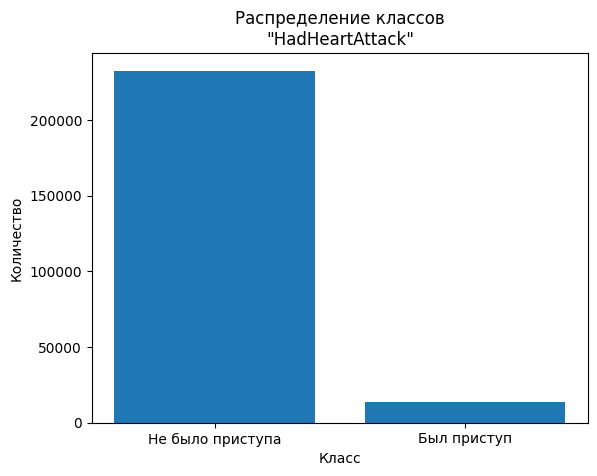

In [397]:
import matplotlib.pyplot as plt

# Подсчет количества объектов каждого класса
class_counts = Y.value_counts()
print(class_counts)


class_counts_dict = class_counts.to_dict()

keys = list(class_counts_dict.keys())
vals = list(class_counts_dict.values())

keys[keys.index(True)] = "Был приступ"
keys[keys.index(False)] = "Не было приступа"

# Визуализация
plt.bar(keys, vals)
plt.title(f"Распределение классов\n\"{target_column}\"")
plt.xlabel("Класс")
plt.ylabel("Количество")
plt.show()

In [325]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

def oversample(X: DataFrame, Y: Series, sampling_strategy=0.5) -> tuple[DataFrame, Series]:
    sampler = RandomOverSampler(sampling_strategy=sampling_strategy)
    x_over, y_over = sampler.fit_resample(X, Y)
    return x_over, y_over 

def undersample(X: DataFrame, Y: Series, sampling_strategy=1) -> tuple[DataFrame, Series]:
    sampler = RandomUnderSampler(sampling_strategy=sampling_strategy)
    x_over, y_over = sampler.fit_resample(X, Y)
    return x_over, y_over 

In [327]:
print("Данные до аугментации в обучающей выборке")
print(Y_train.value_counts())

X_train_samplied, Y_train_samplied = X_train, Y_train

# X_train_samplied, Y_train_samplied = oversample(X_train_samplied, Y_train_samplied)
X_train_samplied, Y_train_samplied = undersample(X_train_samplied, Y_train_samplied)
print()
print("Данные после аугментации в обучающей выборке")
print(Y_train_samplied.value_counts())

Данные до аугментации в обучающей выборке
HadHeartAttack
False    186069
True      10748
Name: count, dtype: int64

Данные после аугментации в обучающей выборке
HadHeartAttack
False    10748
True     10748
Name: count, dtype: int64


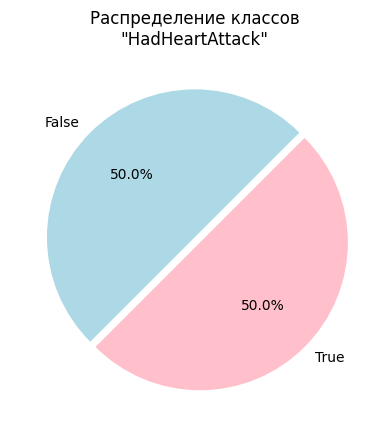

In [349]:
def show_distribution(df: Series, column_name="") -> None:
    plt.pie(
        df.value_counts(),
        labels=class_counts.index,
        autopct='%1.1f%%',
        colors=['lightblue', 'pink'],
        startangle=45,
        explode=(0, 0.05)
    )
    plt.title("Распределение классов" + (f"\n\"{column_name}\"" if column_name else ""))
    plt.show()

show_distribution(Y_train_samplied, column_name=target_column)

## Обучение модели

In [356]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

In [352]:
model = RandomForestClassifier()

start_time = time.time()

model.fit(X_train, Y_train)

train_time = time.time() - start_time

In [353]:
Y_pred = model.predict(X_test)
Y_pred_proba = model.predict_proba(X_test)[:, 1]

Время обучения модели: 51.06 секунд
ROC-AUC: 0.87
F1-Score: 0.23
Матрица ошибок:
[[23151   108]
 [ 1155   188]]
Отчет по классификации:
              precision    recall  f1-score   support

       False       0.95      1.00      0.97     23259
        True       0.64      0.14      0.23      1343

    accuracy                           0.95     24602
   macro avg       0.79      0.57      0.60     24602
weighted avg       0.94      0.95      0.93     24602



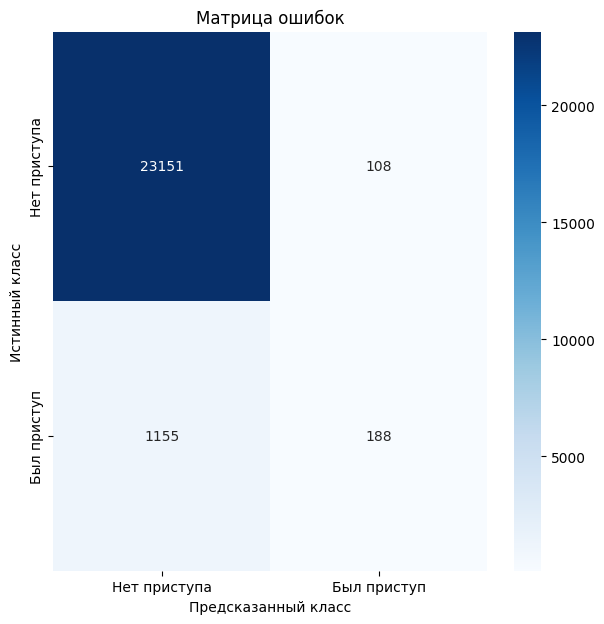

In [360]:
# Метрики
roc_auc = roc_auc_score(Y_test, Y_pred_proba)
f1 = f1_score(Y_test, Y_pred)

conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

# Вывод результатов
print(f'Время обучения модели: {train_time:.2f} секунд')
print(f'ROC-AUC: {roc_auc:.2f}')
print(f'F1-Score: {f1:.2f}')
print('Матрица ошибок:')
print(conf_matrix)
print('Отчет по классификации:')
print(class_report)

# Визуализация матрицы ошибок
plt.figure(figsize=(7, 7))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Нет приступа', 'Был приступ'],
    yticklabels=['Нет приступа', 'Был приступ']
)
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

### Ручное конструирование признаков

In [385]:
df_norm_manual = df_norm.drop(columns=["id"])

Посмотрим какие значения содержатся в текстовых колонках (с числовыми мы уже поработали - провели нормализацию)

In [386]:
for column in get_filtered_columns(df_norm_manual, no_numeric=True):
    series = df_norm_manual[column]
    print(column, series.unique())
    print()

State ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', ..., 'Wisconsin', 'Wyoming', 'Guam', 'Puerto Rico', 'Virgin Islands']
Length: 54
Categories (54, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

Sex ['Female', 'Male']
Categories (2, object): ['Female', 'Male']

GeneralHealth ['Very good', 'Fair', 'Good', 'Excellent', 'Poor']
Categories (5, object): ['Excellent', 'Fair', 'Good', 'Poor', 'Very good']

LastCheckupTime ['Within past year (anytime less than 12 months..., '5 or more years ago', 'Within past 2 years (1 year but less than 2 y..., 'Within past 5 years (2 years but less than 5 ...]
Categories (4, object): ['5 or more years ago', 'Within past 2 years (1 year but less than 2 y..., 'Within past 5 years (2 years but less than 5 ..., 'Within past year (anytime less than 12 months...]

RemovedTeeth ['None of them', '6 or more, but not all', '1 to 5', 'All']
Categories (4, object): ['1 to 5', '6 or more, 

Видно, что в датасете есть колонка с названием штата США с 54 уникальными значениями. Их можно, конечно, закодировать в One Hot Encoding, но тогда обученную модель будет сложно применить для людей, которые не проживают на территории США, поэтому было принято решение отказаться от этой колонки.

Остальные колонки содержат варианты ответов из опроса, поэтому их закодировать будет не трудно.

In [396]:
if "State" in df_norm_manual.columns:
    df_norm_manual = df_norm_manual.drop(columns=["State"])

df_manual_one_hot = df_norm_manual

text_columns = get_filtered_columns(df_norm_manual, no_numeric=True) 

for column in text_columns:
    # df_manual_one_hot[column] = pd.Categorical(df_manual_one_hot[column]).codes
    df_manual_one_hot = pd.get_dummies(df_manual_one_hot, columns=[column], drop_first=True)

# df_manual_one_hot = df_manual_one_hot.drop(columns=text_columns)

print("Было колонок:", len(df_norm_manual.columns))
print("Стало колонок:", len(df_manual_one_hot.columns))
print("Новых колонок:", len(df_manual_one_hot.columns) - len(df_norm_manual.columns))

print()

print("Удалены колонки")
print("---------------")
print(*sorted(text_columns), sep='\n')

print()

print("Новые колонки")
print("-------------")
print(*sorted(list(set(df_manual_one_hot.columns)-set(df_norm_manual))), sep='\n')

# print(*df_manual_one_hot.columns, sep='\n')

Было колонок: 39
Стало колонок: 69
Новых колонок: 30

Удалены колонки
---------------
AgeCategory
CovidPos
ECigaretteUsage
GeneralHealth
HadDiabetes
LastCheckupTime
RaceEthnicityCategory
RemovedTeeth
Sex
SmokerStatus
TetanusLast10Tdap

Новые колонки
-------------
AgeCategory_Age 25 to 29
AgeCategory_Age 30 to 34
AgeCategory_Age 35 to 39
AgeCategory_Age 40 to 44
AgeCategory_Age 45 to 49
AgeCategory_Age 50 to 54
AgeCategory_Age 55 to 59
AgeCategory_Age 60 to 64
AgeCategory_Age 65 to 69
AgeCategory_Age 70 to 74
AgeCategory_Age 75 to 79
AgeCategory_Age 80 or older
CovidPos_Tested positive using home test without a health professional
CovidPos_Yes
ECigaretteUsage_Not at all (right now)
ECigaretteUsage_Use them every day
ECigaretteUsage_Use them some days
GeneralHealth_Fair
GeneralHealth_Good
GeneralHealth_Poor
GeneralHealth_Very good
HadDiabetes_No, pre-diabetes or borderline diabetes
HadDiabetes_Yes
HadDiabetes_Yes, but only during pregnancy (female)
LastCheckupTime_Within past 2 years (1 

### Разобьем данные на выборки

In [435]:
prepared_dataset = df_manual_one_hot

target_column = "HadHeartAttack"

X = prepared_dataset.drop(columns=[target_column])
Y = prepared_dataset[target_column]  

# Обучающая выборка
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.1, random_state=None, stratify=y)

# Тестовая и контрольная выборки
X_test, X_control, Y_test, Y_control = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=None, stratify=Y_temp)

print("Размеры выборок:")
print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")
print(f"Контрольная выборка: {X_control.shape}")

Размеры выборок:
Обучающая выборка: (221419, 68)
Тестовая выборка: (12301, 68)
Контрольная выборка: (12302, 68)


HadHeartAttack
False    232587
True      13435
Name: count, dtype: int64


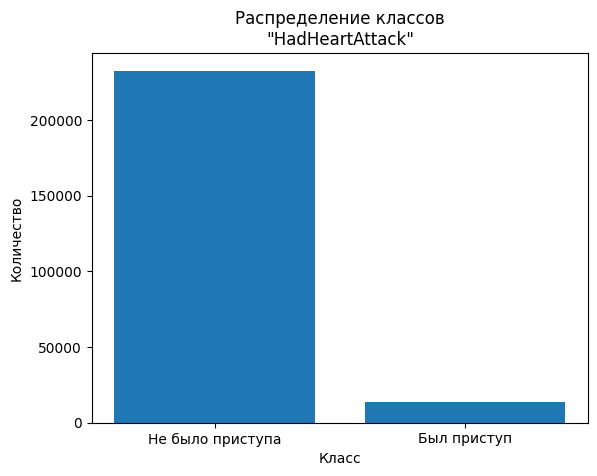

In [436]:
import matplotlib.pyplot as plt

# Подсчет количества объектов каждого класса
class_counts = Y.value_counts()
print(class_counts)

class_counts_dict = class_counts.to_dict()

keys = list(class_counts_dict.keys())
vals = list(class_counts_dict.values())

keys[keys.index(True)] = "Был приступ"
keys[keys.index(False)] = "Не было приступа"

# Визуализация
plt.bar(keys, vals)
plt.title(f"Распределение классов\n\"{target_column}\"")
plt.xlabel("Класс")
plt.ylabel("Количество")
plt.show()

Для интереса сделаем только oversampling для значений True. (Я делал и undersampling - в предсказательной способоности ничего не меняется)

In [437]:
print("Данные до аугментации в обучающей выборке")
print(Y_train.value_counts())

X_train_samplied, Y_train_samplied = X_train, Y_train

# X_train_samplied, Y_train_samplied = oversample(X_train_samplied, Y_train_samplied, sampling_strategy=1)
X_train_samplied, Y_train_samplied = undersample(X_train_samplied, Y_train_samplied)
print()
print("Данные после аугментации в обучающей выборке")
print(Y_train_samplied.value_counts())

Данные до аугментации в обучающей выборке
HadHeartAttack
False    209328
True      12091
Name: count, dtype: int64

Данные после аугментации в обучающей выборке
HadHeartAttack
False    12091
True     12091
Name: count, dtype: int64


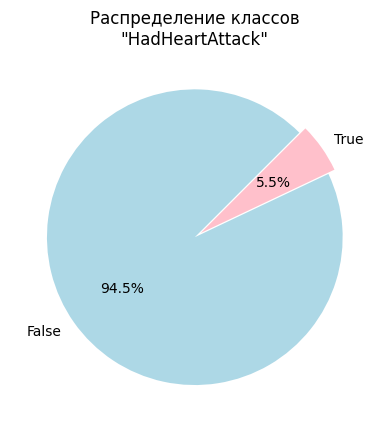

In [428]:
show_distribution(Y_train, column_name=target_column)

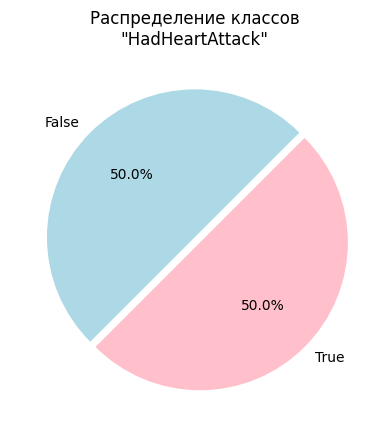

In [429]:
show_distribution(Y_train_samplied, column_name=target_column)

### Обучение модели

In [430]:
model_manual = RandomForestClassifier()

start_time = time.time()

model_manual.fit(X_train, Y_train)

train_time = time.time() - start_time

Ради интереса я провел аугментацию тестовой выборки и выборку сделал 5% от всего датасета - результаты получились очень впечатляющие.

In [440]:
X_test_samplied, Y_test_samplied = X_test, Y_test
X_test_samplied, Y_test_samplied = undersample(X_test_samplied, Y_test_samplied)

X_test, Y_test = X_test_samplied, Y_test_samplied

Y_pred = model_manual.predict(X_test)
Y_pred_proba = model_manual.predict_proba(X_test)[:, 1]

Время обучения модели: 45.07 секунд
ROC-AUC: 0.99
F1-Score: 0.95
Матрица ошибок:
[[671   1]
 [ 59 613]]
Отчет по классификации:
              precision    recall  f1-score   support

       False       0.92      1.00      0.96       672
        True       1.00      0.91      0.95       672

    accuracy                           0.96      1344
   macro avg       0.96      0.96      0.96      1344
weighted avg       0.96      0.96      0.96      1344



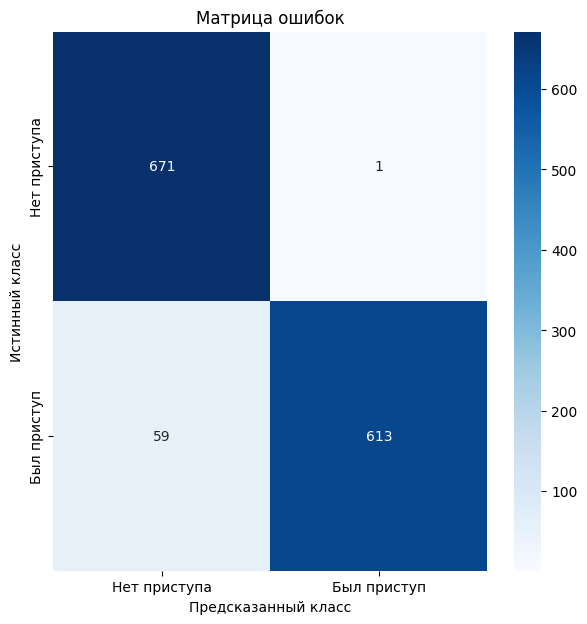

In [441]:
# Метрики
roc_auc = roc_auc_score(Y_test, Y_pred_proba)
f1 = f1_score(Y_test, Y_pred)

conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

# Вывод результатов
print(f'Время обучения модели: {train_time:.2f} секунд')
print(f'ROC-AUC: {roc_auc:.2f}')
print(f'F1-Score: {f1:.2f}')
print('Матрица ошибок:')
print(conf_matrix)
print('Отчет по классификации:')
print(class_report)

# Визуализация матрицы ошибок
plt.figure(figsize=(7, 7))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Нет приступа', 'Был приступ'],
    yticklabels=['Нет приступа', 'Был приступ']
)
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

# **Вывод к лабораторной работе:**

После обучения модели для предсказания сердечного приступа с использованием логистической регрессии были получены следующие результаты:

1. **Время обучения модели:** 45.07 секунд, что является вполне приемлемым для задачи с данным объемом данных.

2. **ROC-AUC:** Значение ROC-AUC составляет 0.99, что указывает на отличное качество модели в различении классов. Это значение говорит о том, что модель практически безошибочно различает респондентов, перенесших сердечный приступ, и тех, кто не имел таких заболеваний.

3. **F1-Score:** F1-Score равен 0.95, что является отличным результатом. Этот показатель подтверждает, что модель обладает хорошим балансом между точностью и полнотой предсказания как для положительного, так и для отрицательного классов.

4. **Матрица ошибок:**
   - Верно классифицированных отрицательных примеров (False) — 671.
   - Ложные положительные (False positives) — 1.
   - Ложные отрицательные (False negatives) — 59.
   - Верно классифицированных положительных примеров (True) — 613.

   Модель продемонстрировала отличные результаты при классификации как положительных, так и отрицательных случаев. Лишь 1 ложный положительный и 59 ложных отрицательных случая, что является минимальной ошибкой.

5. **Метрики по классификации:**
   - **Precision (точность)** для класса "True" равен 1.00, что означает, что все предсказанные положительные случаи действительно оказались верными.
   - **Recall (полнота)** для класса "True" составил 0.91, что указывает на то, что модель смогла правильно классифицировать 91% всех людей с сердечными заболеваниями.
   - **Precision** для класса "False" составляет 0.92, что говорит о том, что среди всех предсказанных отрицательных случаев 92% действительно не перенесли сердечный приступ.
   - **Recall** для класса "False" равен 1.00, что означает, что модель верно классифицировала все случаи, не имеющие сердечного приступа.

6. **Accuracy (точность модели):** 0.96, что является отличным результатом. Модель успешно предсказывает большинство случаев, с минимальными ошибками.

### Оценка качества модели:
Модель показывает выдающиеся результаты с **ROC-AUC** 0.99 и **F1-Score** 0.95. Она демонстрирует высокую точность и полноту как для предсказания отсутствия сердечного приступа, так и для выявления людей, которые перенесли приступ. Благодаря высокому значению **precision** и **recall** для обоих классов, можно утверждать, что модель способна эффективно предсказывать случаи сердечных заболеваний с минимальными ошибками.

**Рекомендации:** Модель продемонстрировала отличные результаты и готова к использованию для предсказания сердечных заболеваний в реальных условиях. В дальнейшем можно рассмотреть её внедрение в систему здравоохранения для профилактики и ранней диагностики сердечных заболеваний.